# Regression
#### Our goal in this notebook is to use regression model in the boston house dataset to predict the price of a house [source](https://www.kaggle.com/vikrishnan/boston-house-prices?select=housing.csv)

First let's import pandas python library to read the the dataset
 

In [1]:
import pandas as pd
df=pd.read_csv("data/boston_house.csv",delim_whitespace=True,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
col_name=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df.columns=col_name

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<img src="data/signification_attribut.PNG"/>

## Exploration Data Analysis (EDA)

First let's describe the data 

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The table displays many observations such as:
* CRIM
     * the gap between the median and the mean of is very large so we can assume that this variable is not normaly distributed
     * also the gap between the standard deviation and the mean are very large so we can assume that the data is very noisy

etc .....

So lets visualize the data 

In [5]:
import seaborn as sns

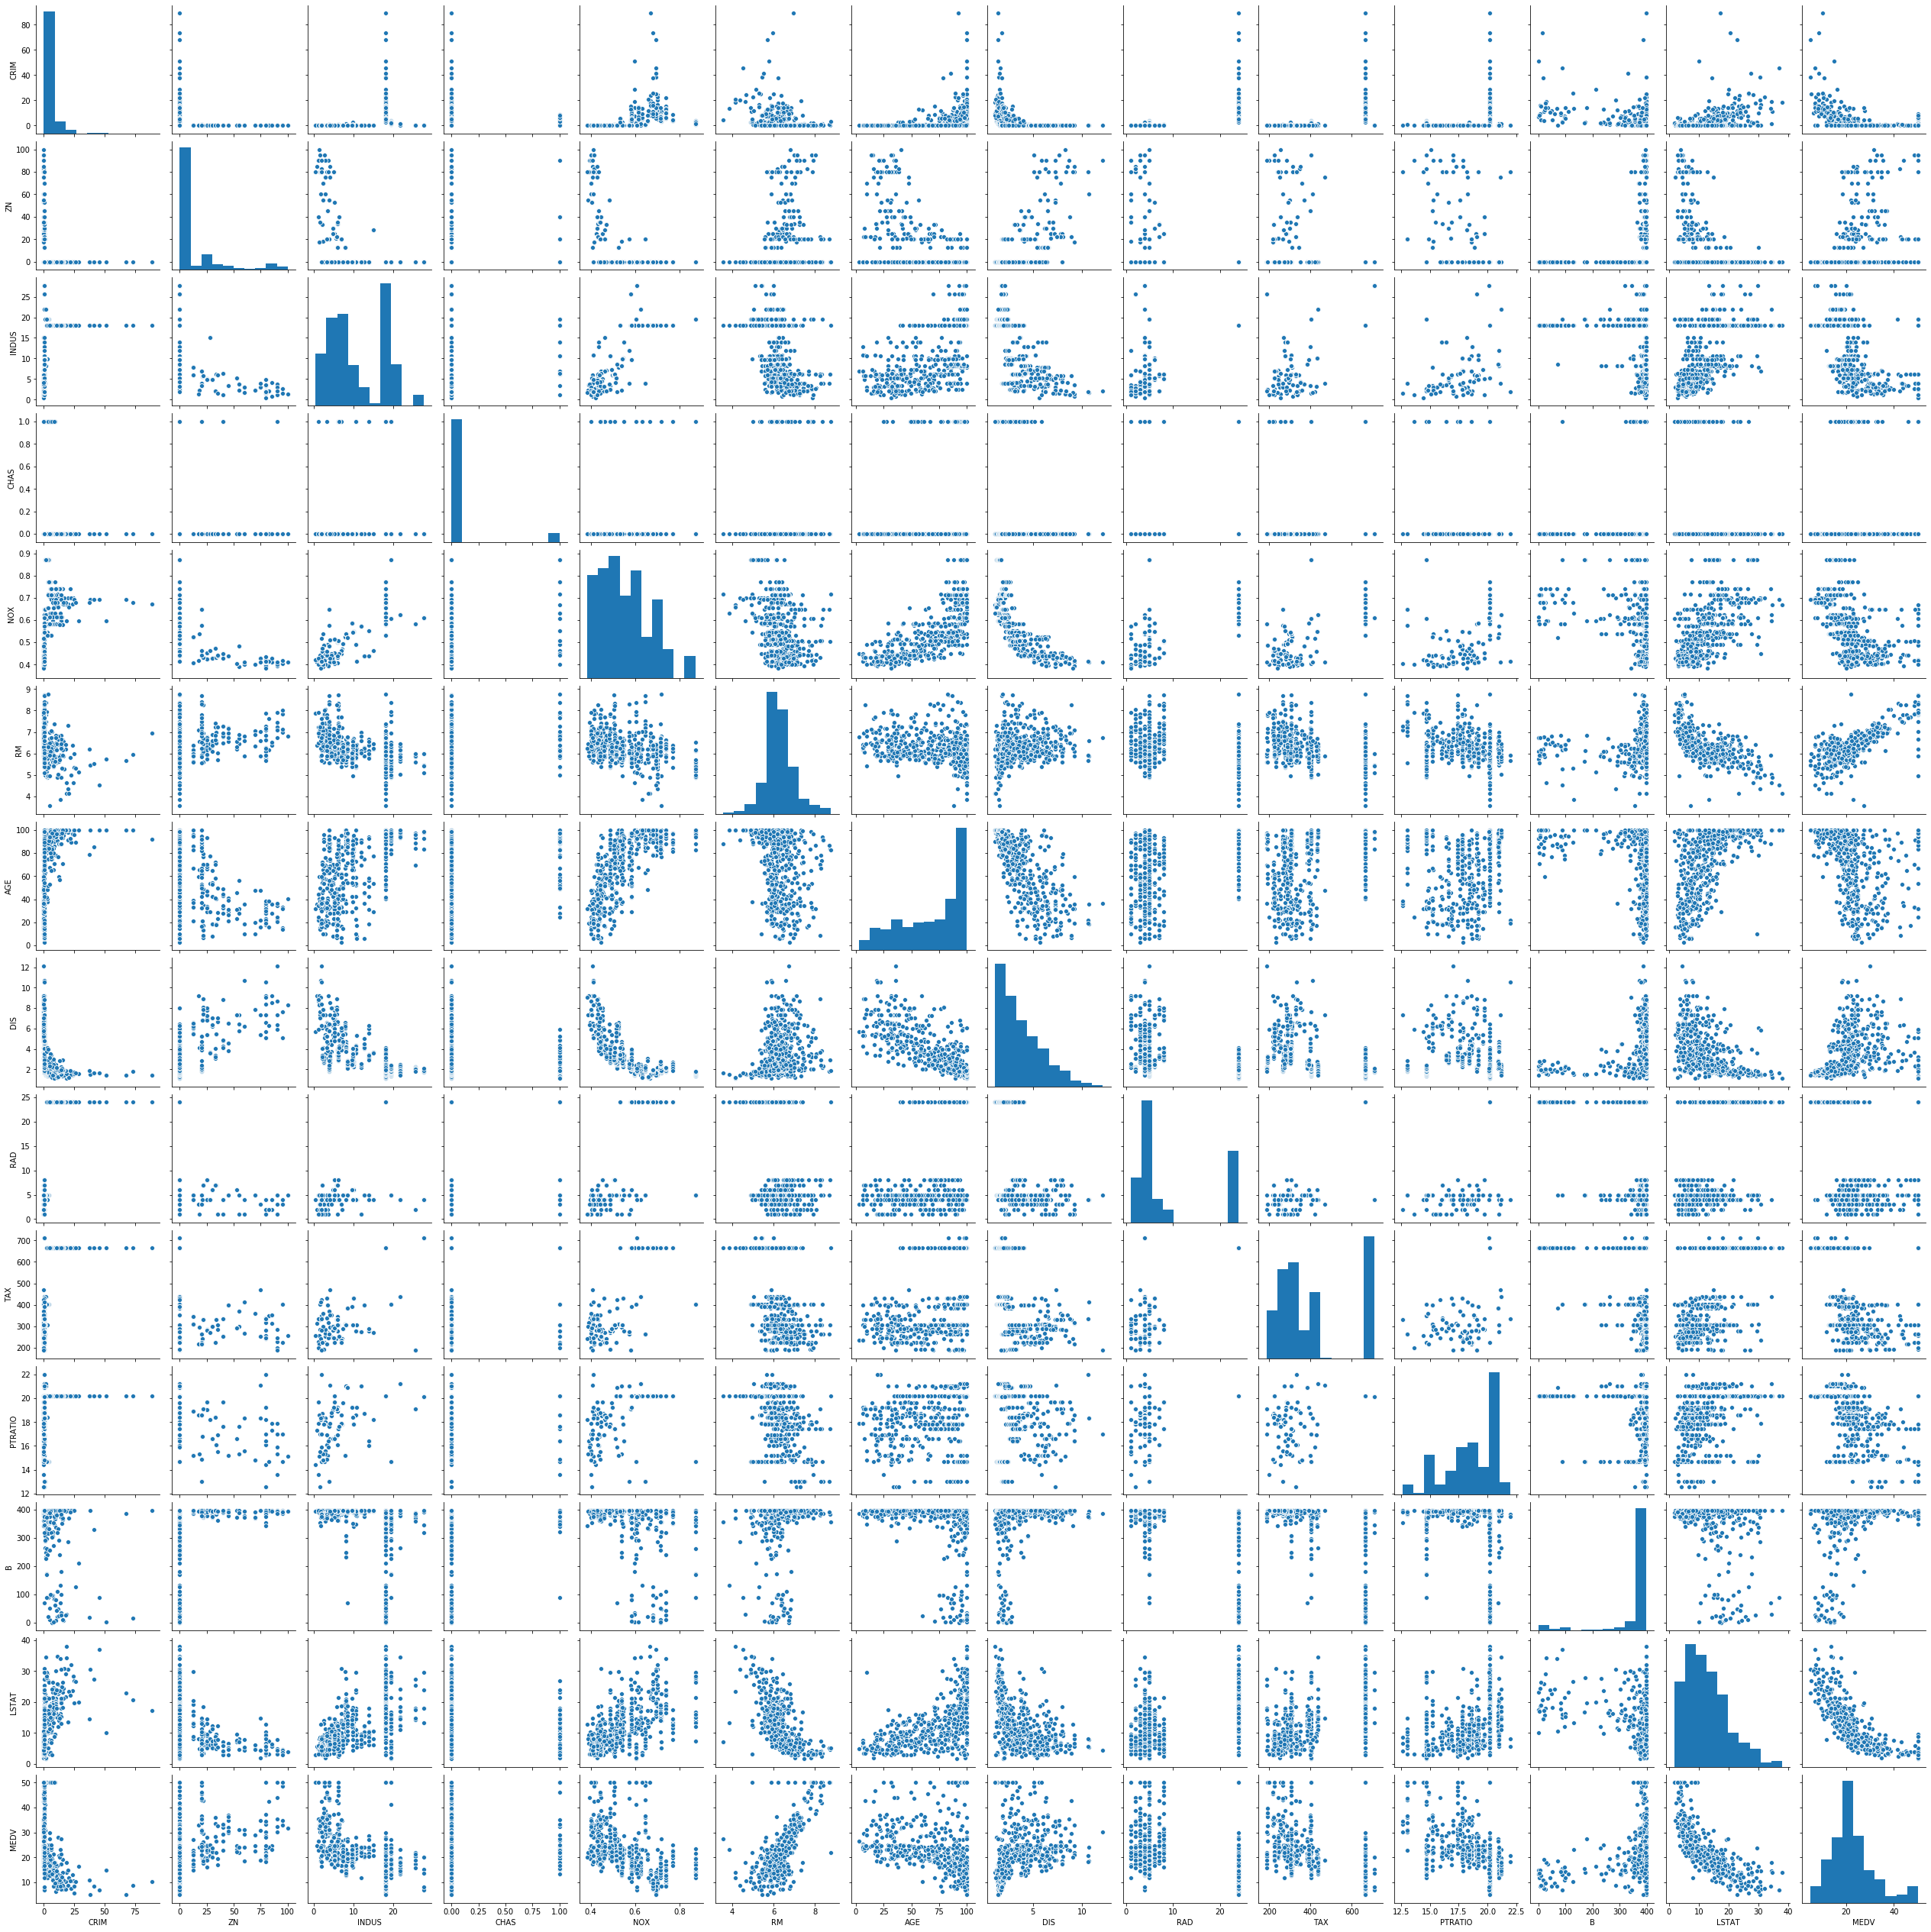

In [6]:
sns.pairplot(df)

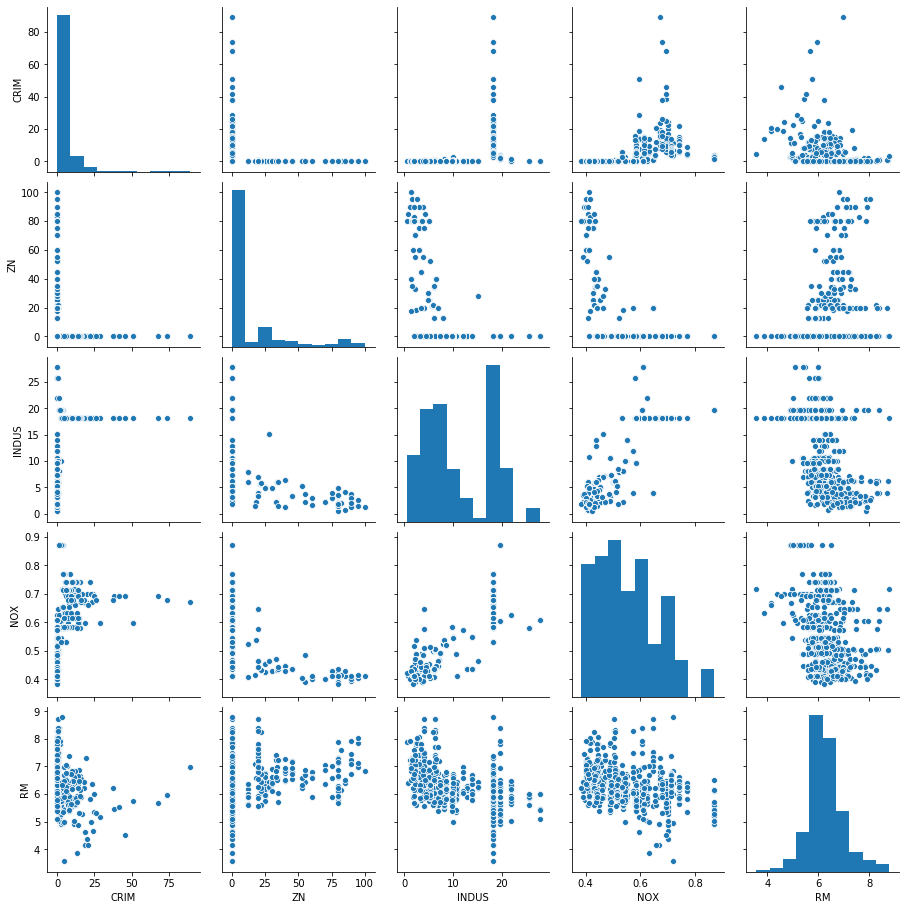

In [7]:
col_study=["CRIM","ZN","INDUS","NOX","RM"]
sns.pairplot(df[col_study])

This plots confrirm that the Crim is concentrated between 0 and 10 and the RM is roughly normaly distributed around the mean 6 between 4 and 8

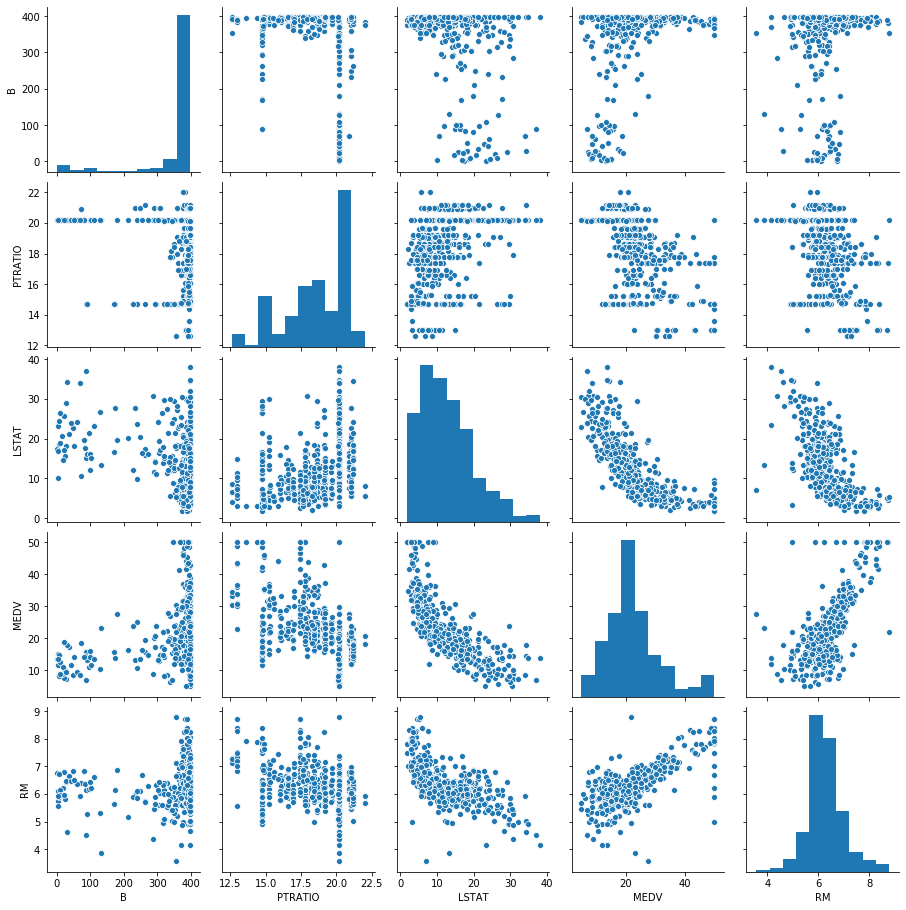

In [8]:
col_study=["B","PTRATIO","LSTAT","MEDV","RM"]
sns.pairplot(df[col_study])

### Observations

 * MEDV is fairly normaly distributed around 20 
 * When the MEDV increase the LSTAT decrease so we have a negative correlation between this two variables but the plot is not 
 * When the RM increase the MEDV increase so we have a positive correlation between this two variables but the plot seems linear 
 
 Let's use functions to try to make lineare the RM and LSAT versus MEDV


Text(0, 0.5, 'LSTAT')

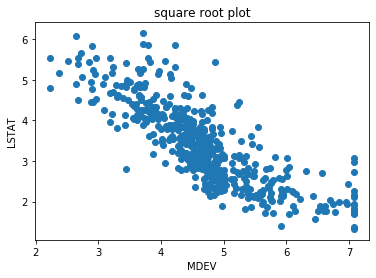

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(np.sqrt(df["MEDV"]),np.sqrt(df["LSTAT"]))
plt.title("square root plot")
plt.xlabel("MDEV")
plt.ylabel("LSTAT")

### The square root plot of the two are variable is linear 

Text(0, 0.5, 'RM')

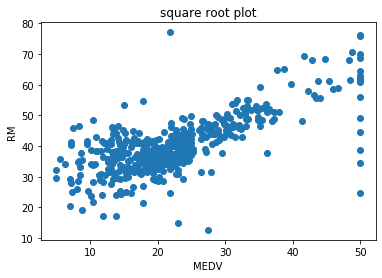

In [10]:
plt.scatter(df["MEDV"],np.square(df["RM"]))
plt.title("square root plot")
plt.xlabel("MEDV") 
plt.ylabel("RM")

### for the RM vs MEDV there are no difference of the normal plot and when we use functions

# Correlation and Features selection 
<span style="color:red"> Features selection </span> is the processus of selecting the feature that can help to predict the outcome

Lets calculate the correlation of all the features using pandas function named corr

In [16]:
pd.options.display.float_format='{:,.2f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Good we can interpret this table focusing on the outcome such as the MEDV 

But Before that seaborn have a nice display for the correlation ,let's try it 

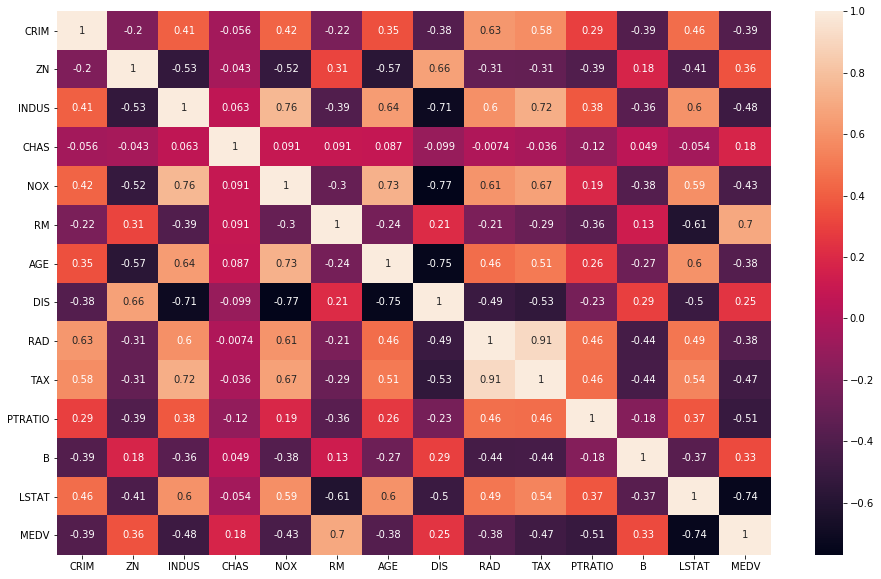

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


### Beautifull
The table displays :
* the MEDV has a small positive correlation with NOX ,PTRATIO , TAX and INDUS respectively 0.43 ,0.51,0.47  and 0.4
* The MEDV has a higher positive correlation with the RM (0.7)
* Te MEDV has a higher negative correlation with the LSTAT

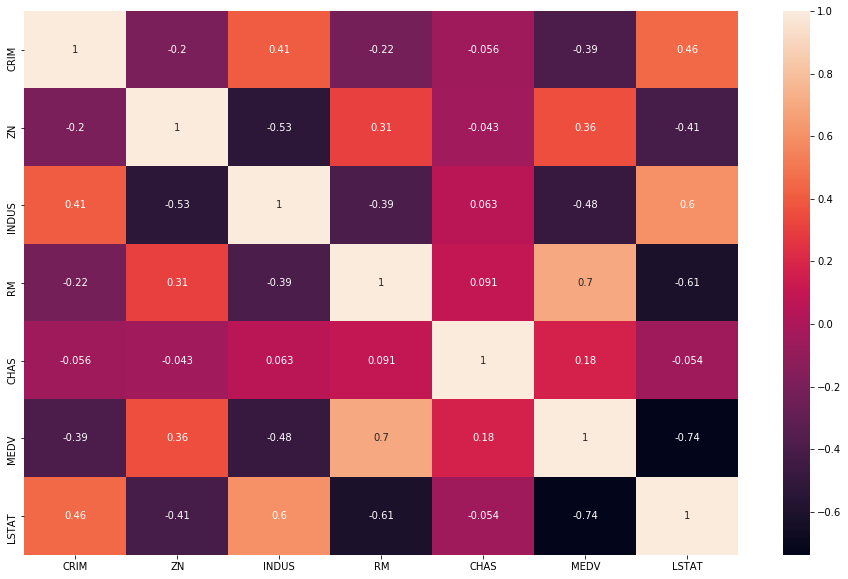

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df[["CRIM","ZN","INDUS","RM","CHAS","MEDV","LSTAT"]].corr(),annot=True)
plt.show()


# Linear regression with scikit learn
Scikit learn is a powerfull python library for machine learning models . In this part we will focus on the regression model

After visualizing the correlation table we see that RM and Lstat are the most corrrelate with the target MEDV

So lets use the LSTAT to predict the median value of owner


In [25]:
X=df["LSTAT"].values.reshape(-1,1)
y=df["MEDV"].values

So lets import the scikit learn library to begin the training of the model

In [40]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()

In [41]:
model.fit(X,y)

LinearRegression()

In [42]:
model.coef_

array([-0.95004935])

In [43]:
model.intercept_

34.5538408793831

## Comparison of  statsmodels and scikit learn in linear regression

In [44]:
import statsmodels.formula.api as sms

In [45]:
model2 =sms.ols(formula="MEDV ~ LSTAT",data=df)

In [47]:
result=model2.fit()

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           5.08e-88
Time:                        16:14:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### COOOOOOOLLLLLLLLLLLLLL we have the same result and the the value of the Rsquared is 54% good for a model

Let's retrurn to the scikit learning 

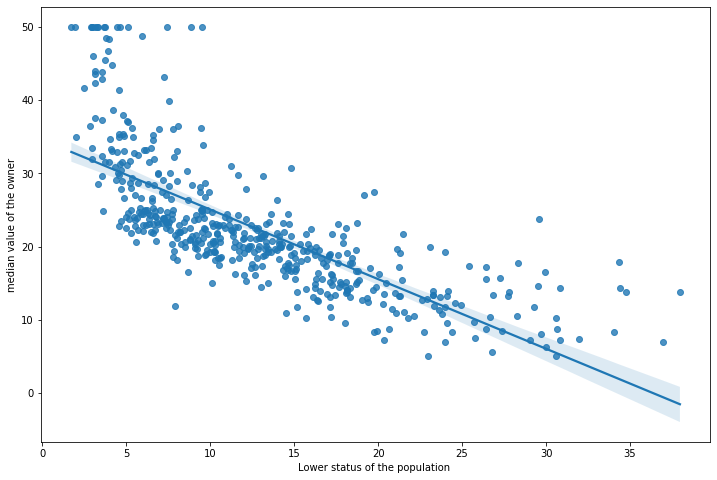

In [39]:
plt.figure(figsize=(12,8))
sns.regplot(X,y)
plt.xlabel("Lower status of the population ")
plt.ylabel("median value of the owner")
plt.show()

# Prediction

In [49]:
model.predict([[5]])

array([29.80359411])

### Our model predict that the value of a house which have 5 percent of lower status of the population is 29.80